### Content

1. Analyze Paths of Different Coins
2. Calculate Statistics and Plot Distribution
3. Target Variable definition / Objective Function
4. Feature engineering

In [37]:
# Import Libraries
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [38]:
# Notebook options
import os

# change working directory
os.chdir('C:\Repos\quant-trading-suite')
print(os.getcwd())

C:\Repos\quant-trading-suite


In [39]:
# Connect to database
con = sqlite3.connect('data/securities_master.db')
c = con.cursor()

In [40]:
# Get list of all symbols listed in 2023
query = """SELECT SYMBOL FROM ASSET_INFO
WHERE Launch_Time >= '2022-01-01'
"""
c.execute(query)
symbols = [symbol[0] for symbol in  c.fetchall()]

print(symbols)

['10000LADYSUSDT', '10000NFTUSDT', '10000STARLUSDT', '1000BONKUSDT', '1000BTTUSDT', '1000FLOKIUSDT', '1000LUNCUSDT', '1000PEPEUSDT', '1000XECUSDT', 'ACHUSDT', 'AGIXUSDT', 'AGLDUSDT', 'AKROUSDT', 'ALPACAUSDT', 'ALPHAUSDT', 'AMBUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARBUSDT', 'ARKMUSDT', 'ARKUSDT', 'ARPAUSDT', 'ASTRUSDT', 'ATAUSDT', 'AUCTIONUSDT', 'BADGERUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BELUSDT', 'BIGTIMEUSDT', 'BLURUSDT', 'BLZUSDT', 'BNBPERP', 'BNTUSDT', 'BNXUSDT', 'BOBAUSDT', 'BONDUSDT', 'BSWUSDT', 'BTC-10NOV23', 'BTC-17NOV23', 'BTC-24NOV23', 'BTC-26JAN24', 'BTC-28JUN24', 'BTC-29DEC23', 'BTC-29MAR24', 'BUSDUSDT', 'CAKEUSDT', 'CEEKUSDT', 'CELOUSDT', 'CFXUSDT', 'CKBUSDT', 'COMBOUSDT', 'COREUSDT', 'CTCUSDT', 'CTSIUSDT', 'CVXUSDT', 'CYBERUSDT', 'DARUSDT', 'DENTUSDT', 'DGBUSDT', 'DODOUSDT', 'EDUUSDT', 'ETCPERP', 'ETH-10NOV23', 'ETH-17NOV23', 'ETH-24NOV23', 'ETH-26JAN24', 'ETH-28JUN24', 'ETH-29DEC23', 'ETH-29MAR24', 'ETHPERP', 'ETHWUSDT', 'FETUSDT', 'FITFIUSDT', 'FLMUSDT', 'FLRU

In [69]:
# Import first 100 bars of each asset


# get column names
query = """
PRAGMA table_info(KLINES_1H)
"""
c.execute(query)
cols = c.fetchall()
col_names = [col[1] for col in cols]

# create dictionary for symbols
data = {}

for symbol in symbols:
    query=f"""SELECT * FROM KLINES_1H WHERE SYMBOL = '{symbol}' LIMIT 100"""
    c.execute(query)
    
    temp = pd.DataFrame(c.fetchall(), columns=col_names)
    
    temp['return'] = temp['Close'].pct_change()

    temp['creturn'] = (1 + temp['return']).cumprod()
    
    temp.insert(0, "T", temp.index)
    
    data[symbol] = temp

In [70]:
data[symbol].head()

,T,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,creturn
0,0,Bybit,linear,ZRXUSDT,2022-03-28 10:00:00,0.7444,0.7452,0.7430,0.7445,7580.0,2023-11-16 16:13:37,NaN,NaN
1,1,Bybit,linear,ZRXUSDT,2022-03-28 11:00:00,0.7445,0.7512,0.7388,0.7419,134536.0,2023-11-16 16:13:37,-0.003492,0.996508
2,2,Bybit,linear,ZRXUSDT,2022-03-28 12:00:00,0.7419,0.7484,0.7287,0.7375,536932.0,2023-11-16 16:13:37,-0.005931,0.990598
3,3,Bybit,linear,ZRXUSDT,2022-03-28 13:00:00,0.7375,0.7410,0.7366,0.7394,65167.0,2023-11-16 16:13:37,0.002576,0.993150
4,4,Bybit,linear,ZRXUSDT,2022-03-28 14:00:00,0.7394,0.7394,0.7203,0.7377,252931.0,2023-11-16 16:13:37,-0.002299,0.990866


In [71]:
data[symbol].tail()

,T,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,creturn
95,95,Bybit,linear,ZRXUSDT,2022-04-01 09:00:00,0.8158,0.8203,0.7976,0.8016,91208.0,2023-11-16 16:13:37,-0.017406,1.076696
96,96,Bybit,linear,ZRXUSDT,2022-04-01 10:00:00,0.8016,0.8109,0.7974,0.8108,65792.0,2023-11-16 16:13:37,0.011477,1.089053
97,97,Bybit,linear,ZRXUSDT,2022-04-01 11:00:00,0.8108,0.8258,0.8061,0.8243,118751.0,2023-11-16 16:13:37,0.016650,1.107186
98,98,Bybit,linear,ZRXUSDT,2022-04-01 12:00:00,0.8243,0.8966,0.8151,0.8206,713109.0,2023-11-16 16:13:37,-0.004489,1.102216
99,99,Bybit,linear,ZRXUSDT,2022-04-01 13:00:00,0.8206,0.8226,0.8083,0.8118,108446.0,2023-11-16 16:13:37,-0.010724,1.090396


In [44]:
# Calculate the cumulative returns for each asset
    

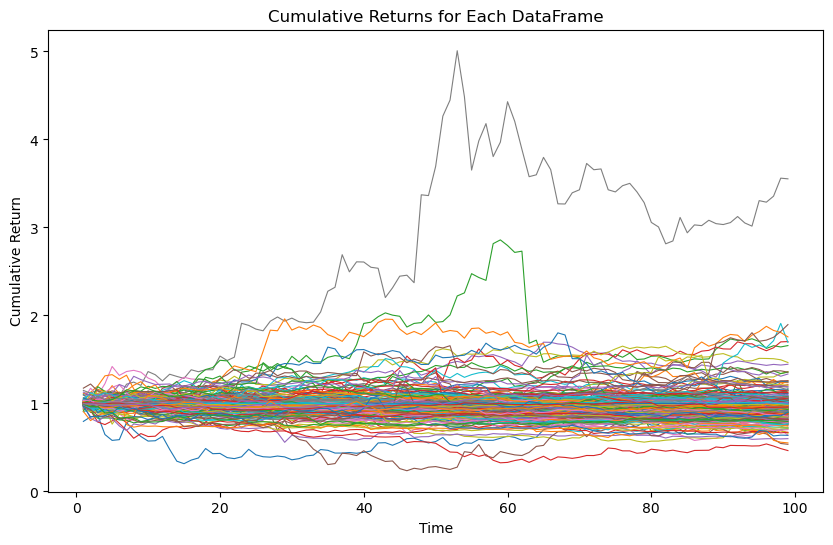

In [72]:
# Plot all the cumulative returns one chart

# create a plot
plt.figure(figsize=(10,6))

# plot cumulative returns of each asset
for symbol in symbols:
    temp = data[symbol]
    plt.plot(temp['creturn'], label=symbol, lw=0.8)
  
# set labels and title
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns for Each DataFrame')

# display the plot without legeng
plt.legend().set_visible(False)

# show the plot
plt.show()

In [73]:
# Plot all cumulative returns on a plotly graph

# Create a figure
fig = go.Figure()

# Plot cumulative returns for each symbol
for symbol in symbols:
    temp = data[symbol]
    fig.add_trace(go.Scatter(y=temp['creturn'], mode='lines', name=symbol, line=dict(width=0.8)))

# Set layout
fig.update_layout(
    title='Cumulative Returns for Each DataFrame',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Cumulative Return'),
    showlegend=False,  # Hide legend
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [76]:
# Calculate Statistics and Distribution
combined_creturns = pd.concat([df[['T','Symbol','creturn']] for df in data.values()], axis=0)
combined_creturns.columns = [df['Symbol'].iloc[0] for df in data.values()]

combined_creturns

,T,Symbol,creturn
0,0,10000LADYSUSDT,NaN
1,1,10000LADYSUSDT,0.795684
2,2,10000LADYSUSDT,0.847269
3,3,10000LADYSUSDT,0.863452
4,4,10000LADYSUSDT,0.646325
...,...,...,...
95,95,ZRXUSDT,1.076696
96,96,ZRXUSDT,1.089053
97,97,ZRXUSDT,1.107186
98,98,ZRXUSDT,1.102216


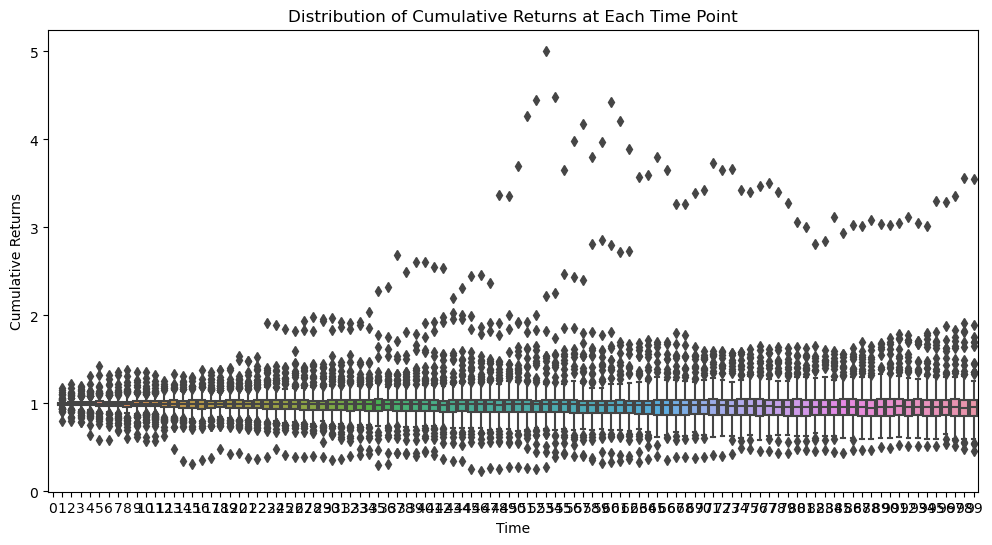

In [79]:
# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='T', y='creturn', data=combined_creturns)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Distribution of Cumulative Returns at Each Time Point')
plt.show()

In [47]:
# Calculate the cumulative returns for each asset relative to BTC